<a href="https://colab.research.google.com/github/sraghav42/machine_learning/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.52535261 0.16398888 0.82121957 ... 0.7144194  0.29128933 0.36406245]


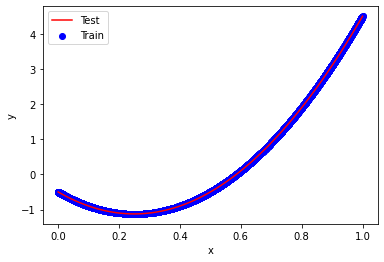

In [18]:
%tensorflow_version 2.x

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,RMSprop
from tensorflow.keras.models import model_from_json
 
from matplotlib import pyplot as plt
 
import numpy as np

def function(x):
    return 10*x**2 - 5*x - 0.5

x_train = np.random.rand(10000)
print(x_train)
y_train = function(x_train)
 
x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

plt.scatter(x_train, y_train, label='Train', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()


Epoch 1/20
200/200 [==============================] - 0s 2ms/step - loss: 0.9818 - val_loss: 0.0463
Epoch 2/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0094
Epoch 3/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 4/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 5/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 7/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/20
200/200 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
200/200 [==============================] - 0s 1ms/step - loss: 8.5897e-04 - val_loss: 8.0542e-04
Epoch 10/20
200/200 [==============================] - 0s 1ms/step - loss: 5.7193e-04 - val_

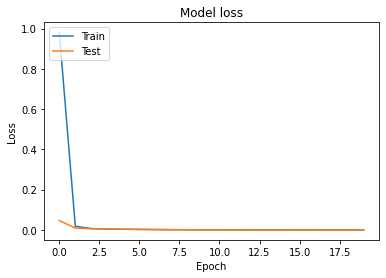

In [19]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))


model.compile(loss='mean_squared_error', optimizer=Adam())

history = model.fit(x_train, y_train, batch_size=50, epochs=20, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

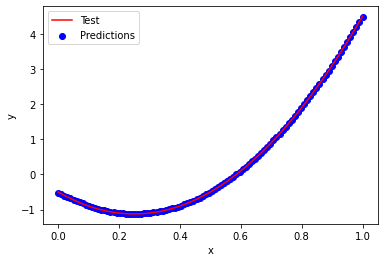

In [20]:
y_predictions = model.predict(x_test)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

Save a model

In [0]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

Restore a model

In [0]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

Predict using the restored model

In [0]:

y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()